In [17]:
# Import required libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

##### The code performs the following actions:

* It selects specific columns critical for the analysis of car data: the model year, price, body type, taxi use, mileage, and days on the market.
* The large volume of data is divided into smaller portions, allowing for processing without overloading the computer's memory.
* Only the rows clearly marked regarding whether the car has been used as a taxi or not are filtered from the data.
* The focus is on cars from the years 2000 to 2020.
* Cars are categorized into three groups based on their body type: all cars, sedans, and SUV models.
* The filtered data segments are then recombined into cohesive datasets, maintaining order and considering only the necessary information.

After this, the data is ready for further analysis and comparison.

In [18]:
# Define columns to be read
columns_to_use = ['year', 'price', 'body_type', 'isCab', 'mileage', 'daysonmarket']

# Set the chunk size
chunk_size = 1300000
data_file = 'used_cars_data.csv'

# Valid values for isCab column
isCab_values = [True, False]

# Initialize lists to store chunks for sedans and SUVs and all cars
all_cars_chunk_list = []
sedan_chunk_list = []
suv_chunk_list = []  

# Read the CSV in chunks
chunks = pd.read_csv(data_file, usecols=columns_to_use, chunksize=chunk_size, low_memory = False)

# Filter chunks and append results to list
chunk_list = []

for chunk in chunks:
    # Remove rows where isCab is not True or False
    chunk = chunk[chunk['isCab'].isin(isCab_values)]
    
     # Filter for the years 2000 - 2020
    filtered_chunk = chunk[(chunk['year'] >= 2000) & (chunk['year'] <= 2020)]
    
    # Add the filtered chunk to the all cars chunk list
    all_cars_chunk_list.append(filtered_chunk)
    
    # Filter for sedans and SUVs and add to their respective lists
    sedan_chunk_list.append(filtered_chunk[filtered_chunk['body_type'] == 'Sedan'])
    suv_chunk_list.append(filtered_chunk[filtered_chunk['body_type'] == 'SUV / Crossover'])
    
# Combine the filtered chunks into a single DataFrame that includes only cars with 'True' or 'False' in the isCab column
# and only cars that have a 'year' value between 2000 and 2020
all_cars_df = pd.concat(all_cars_chunk_list, ignore_index=True)
sedans_df = pd.concat(sedan_chunk_list, ignore_index=True)
suvs_df = pd.concat(suv_chunk_list, ignore_index=True)

##### The code blocks below perform the following analytical functions:

Cars are grouped based on whether they have been used as taxis or not, and average prices for each year are calculated.

* The prices for cars marked as taxis are calculated and stored in the taxi_prices variable.
* The prices for cars not marked for taxi use are calculated and stored in the non_taxi_prices variable.
* A new data structure is created to compare the annual average prices of taxis and other cars.
* This structure records the years, average prices for taxis, and non-taxis, clearly segregated.

The same process is repeated for sedan-type cars:

* Prices for sedan taxis are grouped and calculated.
* Prices for non-taxi sedans are grouped and calculated.
* The price comparison for sedan cars is saved in its own data structure, enabling a comparison of average prices.

Finally, the same function is performed for SUV-type cars:
* Prices for SUV taxis are grouped and calculated.
* Prices for non-taxi SUVs are grouped and calculated.
* The price comparison for SUVs is also saved in its own data structure.

In [19]:
# Group cars used as taxis and not used as taxis by year and calculate average prices
taxi_prices = all_cars_df[all_cars_df['isCab'] == True].groupby('year')['price'].mean()
non_taxi_prices = all_cars_df[all_cars_df['isCab'] == False].groupby('year')['price'].mean()

# Save the average prices into a new DataFrame for comparison
all_cars_price_comparison = pd.DataFrame({
    'Year': taxi_prices.index,
    'Taxi Mean Price': taxi_prices.values,
    'Non-Taxi Mean Price': non_taxi_prices.reindex(taxi_prices.index).values  # Varmistetaan, että vuodet vastaavat toisiaan
})


In [20]:
# Group sedan taxis and sedan non-taxis by year and calculate average prices
taxis_prices = sedans_df[sedans_df['isCab'] == True].groupby('year')['price'].mean()
non_taxis_prices = sedans_df[sedans_df['isCab'] == False].groupby('year')['price'].mean()

# Save the average prices into a new DataFrame for comparison
sedan_price_comparison = pd.DataFrame({
    'Year': taxis_prices.index,
    'Sedan Taxi Mean Price': taxis_prices.values,
    'Non-Taxi Mean Price': non_taxis_prices.reindex(taxis_prices.index).values  # Varmistetaan, että vuodet vastaavat toisiaan
})


In [21]:
# Group SUV taxis and SUV non-taxis by year and calculate average prices
suv_taxis_prices = suvs_df[suvs_df['isCab'] == True].groupby('year')['price'].mean()
suv_non_taxis_prices = suvs_df[suvs_df['isCab'] == False].groupby('year')['price'].mean()

# Save the average prices into a new DataFrame for comparison
suv_price_comparison = pd.DataFrame({
    'Year': suv_taxis_prices.index,
    'SUV Taxi Mean Price': suv_taxis_prices.values,
    'SUV Non-Taxi Mean Price': suv_non_taxis_prices.reindex(suv_taxis_prices.index).values  # Varmistetaan, että vuodet vastaavat toisiaan
})

In summary, these code cells are used for analyzing the data to understand price trends over the years, specifically looking at the average prices of vehicles used as taxis versus those not used as taxis, and further breaking down the analysis by vehicle type (all cars, sedans, and SUVs/crossovers).

##### For All Cars:

* The 'Year' column is set as the index for the all_cars_price_comparison DataFrame.
* A line chart is created to compare the average prices of all taxis versus non-taxis for each year between 2000 and 2020.
* The chart is formatted with a title, axis labels, a legend, and a grid to enhance readability.

<Figure size 1000x600 with 0 Axes>

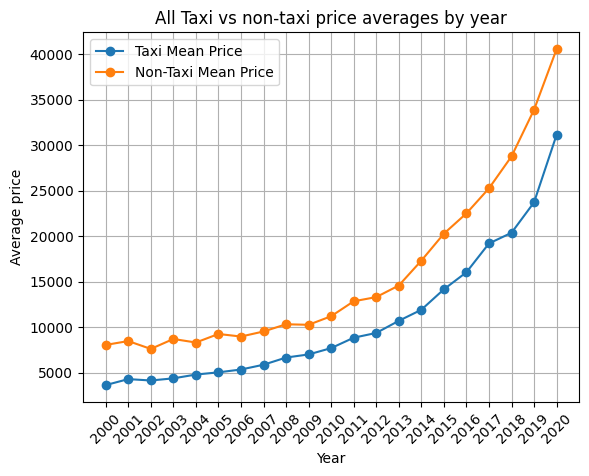

In [22]:
# Set year as the index
all_cars_price_comparison.set_index('Year', inplace=True)

# Plot the chart
plt.figure(figsize=(10, 6))
all_cars_price_comparison.plot(kind='line', marker='o')
plt.xticks(np.arange(2000, 2021, step=1), rotation=45)
plt.title('All Taxi vs non-taxi price averages by year')
plt.xlabel('Year')
plt.ylabel('Average price')
plt.legend()
plt.grid(True)
plt.show()

##### For Sedans:

* Similarly, the sedan_price_comparison DataFrame is indexed by 'Year'.
* A line chart is plotted to show the average price trends of sedan taxis compared to non-taxis over the same years.
* The chart includes formatting choices such as rotating the x-axis labels for better visibility.

<Figure size 1000x600 with 0 Axes>

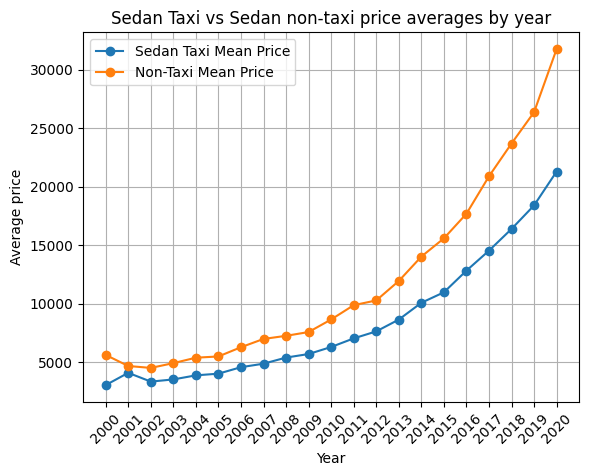

In [23]:
# Set year as the index
sedan_price_comparison.set_index('Year', inplace=True)

# Plot the chart
plt.figure(figsize=(10, 6))
sedan_price_comparison.plot(kind='line', marker='o')
plt.xticks(np.arange(2000, 2021, step=1), rotation=45)
plt.title('Sedan Taxi vs Sedan non-taxi price averages by year')
plt.xlabel('Year')
plt.ylabel('Average price')
plt.legend()
plt.grid(True)
plt.show()


##### For SUVs:

* The 'Year' is set as the index for the suv_price_comparison DataFrame.
* A line chart is plotted for the average prices of SUV taxis versus non-taxis, with similar formatting to the previous charts for consistency.

<Figure size 1000x600 with 0 Axes>

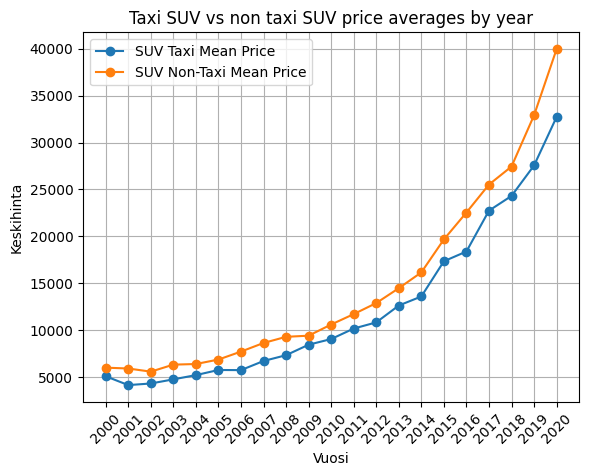

In [24]:
# Set year as the index
suv_price_comparison.set_index('Year', inplace=True)

# Plot the chart
plt.figure(figsize=(10, 6))
suv_price_comparison.plot(kind='line', marker='o')
plt.xticks(np.arange(2000, 2021, step=1), rotation=45)
plt.title('Taxi SUV vs non taxi SUV price averages by year')
plt.xlabel('Vuosi')
plt.ylabel('Keskihinta')
plt.legend()
plt.grid(True)
plt.show()

##### The code block below performs these operations:

* Retrieves the current year using the datetime.now().year function from the datetime module.
* Calculates the age of each car in the all_cars_df, sedans_df, and suvs_df DataFrames by subtracting the car's 'year' from the current year.
* Groups the cars in each category by whether they are taxis (isCab) and computes the average age for each group.
* Constructs a new DataFrame, avg_age_comparison, which compiles the average ages of all cars, sedans, and SUVs, categorizing them into taxis and non-taxis.
* The resulting DataFrame is transposed so that the car types become the rows, which makes it easier to compare the average ages across car types and taxi use.

In [25]:
from datetime import datetime
current_year = datetime.now().year

# Calculate the age for each car category
all_cars_df['Age'] = current_year - all_cars_df['year']
sedans_df['Age'] = current_year - sedans_df['year']
suvs_df['Age'] = current_year - suvs_df['year']

# Calculate the average age for taxis and non-taxis within each car category
avg_age_all = all_cars_df.groupby('isCab')['Age'].mean()
avg_age_sedans = sedans_df.groupby('isCab')['Age'].mean()
avg_age_suvs = suvs_df.groupby('isCab')['Age'].mean()

# Form a DataFrame containing the necessary data
avg_age_comparison = pd.DataFrame({
    'All Cars': avg_age_all,
    'Sedans': avg_age_sedans,
    'SUVs': avg_age_suvs
}).T  # Transpose so car types become rows

##### Plotting Average Age Comparison:

* Initializes a figure and axes for plotting using Matplotlib.
* Plots a bar chart on the initialized axes, representing the average age of all cars, sedans, and SUVs, differentiating between taxis and non-taxis.
* Sets the title of the plot to 'Average Age Comparison Between Taxis and Non-Taxis' and labels the y-axis as 'Average Age (years)'.
* Adjusts the x-axis labels to show the categories 'All Cars', 'Sedans', and 'SUVs' without rotation for clarity.
* Defines the legend to differentiate between non-taxis and taxis, aiding in visual interpretation.
* Displays the plot with plt.show().

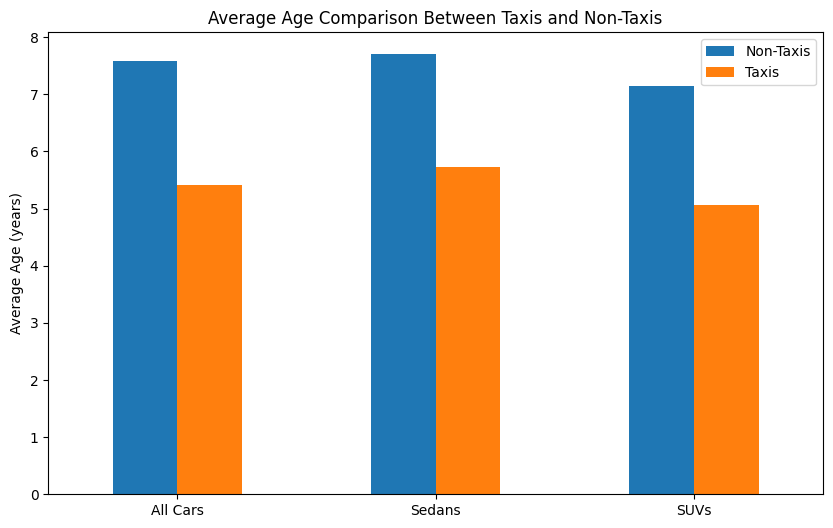

In [26]:
# Plot the chart
fig, ax = plt.subplots(figsize=(10, 6))

avg_age_comparison.plot(kind='bar', ax=ax)
ax.set_title('Average Age Comparison Between Taxis and Non-Taxis')
ax.set_ylabel('Average Age (years)')
ax.set_xticklabels(['All Cars', 'Sedans', 'SUVs'], rotation=0)

# Explanations for the colors
ax.legend(['Non-Taxis', 'Taxis'])

plt.show()

##### Calculating Average Mileage:

* Calculates the average mileage for taxis and non-taxis across all cars, sedans, and SUVs by grouping the data in each respective DataFrame (all_cars_df, sedans_df, suvs_df) by the 'isCab' column and finding the mean 'mileage'.
* Forms a new DataFrame avg_miles_comparison which brings together these average mileages, with the car types as rows after transposing the DataFrame.

In [27]:
# Calculate average mileage for taxis and non-taxis for each DataFrame object
avg_miles_all = all_cars_df.groupby('isCab')['mileage'].mean()
avg_miles_sedans = sedans_df.groupby('isCab')['mileage'].mean()
avg_miles_suvs = suvs_df.groupby('isCab')['mileage'].mean()

# Form a DataFrame containing the necessary data
avg_miles_comparison = pd.DataFrame({
    'All Cars': avg_miles_all,
    'Sedans': avg_miles_sedans,
    'SUVs': avg_miles_suvs
}).T  # Transpose so car types become rows


##### Same logic goes for the next 2 charts

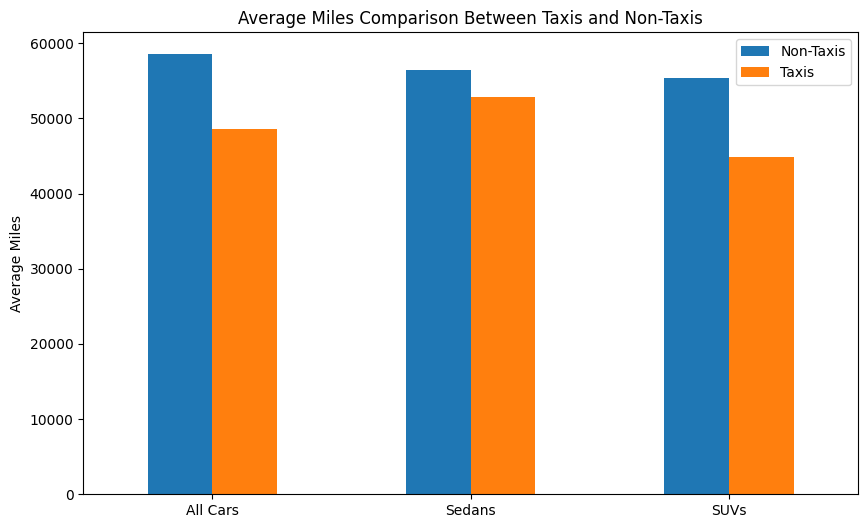

In [28]:
# Plot the chart
fig, ax = plt.subplots(figsize=(10, 6))

avg_miles_comparison.plot(kind='bar', ax=ax)
ax.set_title('Average Miles Comparison Between Taxis and Non-Taxis')
ax.set_ylabel('Average Miles')
ax.set_xticklabels(['All Cars', 'Sedans', 'SUVs'], rotation=0)

# Explanations for the colors
ax.legend(['Non-Taxis', 'Taxis'])

plt.show()

In [29]:
# Calculate average prices
average_prices_all = all_cars_df.groupby('isCab')['price'].mean()
average_prices_sedans = sedans_df.groupby('isCab')['price'].mean()
average_prices_suvs = suvs_df.groupby('isCab')['price'].mean()

# Convert averages to a DataFrame
average_prices_df = pd.DataFrame({
    'All Cars': average_prices_all,
    'Sedans': average_prices_sedans,
    'SUVs': average_prices_suvs
}).T  # Transpose so car types become rows

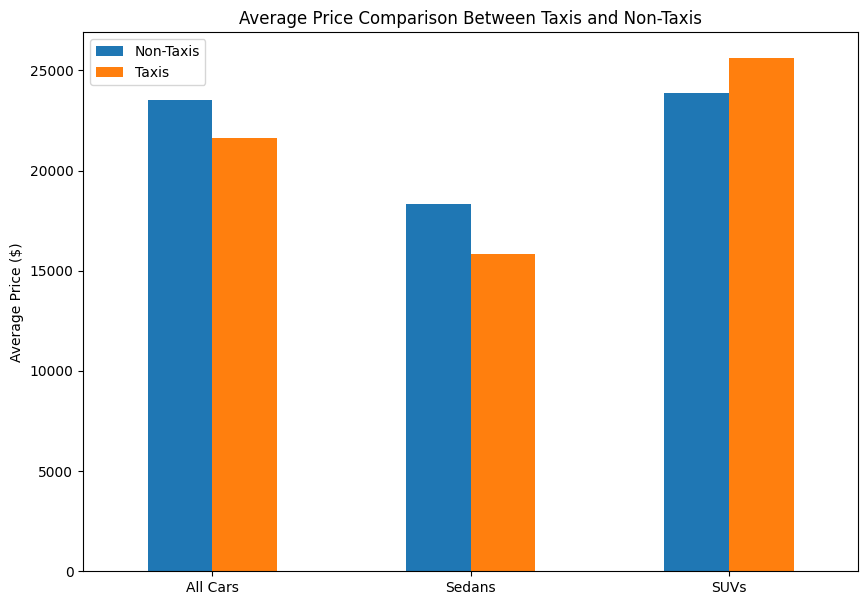

In [30]:
# Plot the chart
fig, ax = plt.subplots(figsize=(10, 7))
average_prices_df.plot(kind='bar', ax=ax)

# Set chart titles
ax.set_title('Average Price Comparison Between Taxis and Non-Taxis')
ax.set_ylabel('Average Price ($)')
ax.set_xticklabels(ax.get_xticklabels(), rotation=0)

# Set legend title and colors
ax.legend(['Non-Taxis', 'Taxis'])

plt.show()

##### Defining a Function:

* A function named calculate_percentage_difference is defined, which calculates the percentage difference between a taxi value and a non-taxi value. This is used to assess how much higher or lower the taxi values are compared to non-taxis in terms of price, mileage, and age.

##### Calculating Percentage Differences:

* The function is applied to the average prices, mileage, and age for all cars, sedans, and SUVs to determine the percentage differences between taxis and non-taxis for each category.
It assumes the existence of variables like average_prices_all, avg_miles_all, and avg_age_all, which would hold the respective data for these categories.

##### Creating a DataFrame for Differences:

* A new DataFrame called differences_df is created, storing the calculated percentage differences in price, mileage, and age across all cars, sedans, and SUVs.

In [31]:
def calculate_percentage_difference(taxi_value, non_taxi_value):
    return ((taxi_value - non_taxi_value) / non_taxi_value) * 100

# Calculate percentage differences for each category
price_difference_all = calculate_percentage_difference(
    average_prices_all[True], average_prices_all[False])
price_difference_sedans = calculate_percentage_difference(
    average_prices_sedans[True], average_prices_sedans[False])
price_difference_suvs = calculate_percentage_difference(
    average_prices_suvs[True], average_prices_suvs[False])

mileage_difference_all = calculate_percentage_difference(
    avg_miles_all[True], avg_miles_all[False])
mileage_difference_sedans = calculate_percentage_difference(
    avg_miles_sedans[True], avg_miles_sedans[False])
mileage_difference_suvs = calculate_percentage_difference(
    avg_miles_suvs[True], avg_miles_suvs[False])

age_difference_all = calculate_percentage_difference(
    avg_age_all[True], avg_age_all[False])
age_difference_sedans = calculate_percentage_difference(
    avg_age_sedans[True], avg_age_sedans[False])
age_difference_suvs = calculate_percentage_difference(
    avg_age_suvs[True], avg_age_suvs[False])

# Form a DataFrame for plotting percentage differences
differences_df = pd.DataFrame({
    'Price Difference': [price_difference_all, price_difference_sedans, price_difference_suvs],
    'Mileage Difference': [mileage_difference_all, mileage_difference_sedans, mileage_difference_suvs],
    'Age Difference': [age_difference_all, age_difference_sedans, age_difference_suvs]
}, index=['All Cars', 'Sedans', 'SUVs'])

##### Plotting the Results:

* A bar chart is plotted to visually represent these percentage differences.
* The chart includes a horizontal line at y=0 to distinguish between positive and negative values.
* The chart's title and axes are labeled to reflect the comparison of percentage differences, and the x-axis labels are the categories of cars without rotation.
* A grid is added to improve readability, and the legend is positioned outside the plot area for clarity.

The chart below presents a comparative analysis, illustrating the average prices, mileage, and age of taxis relative to non-taxis, expressed in terms of percentage differences.

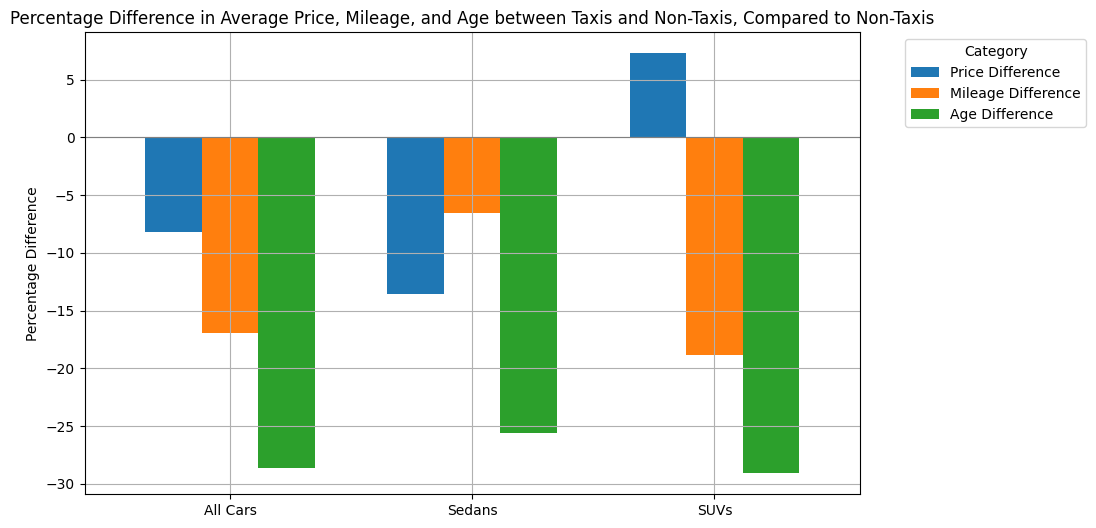

In [32]:
# Plot the chart
fig, ax = plt.subplots(figsize=(10, 6))
ax.axhline(0, color='grey', linewidth=0.8)
differences_df.plot(kind='bar', ax=ax, width=0.7)
ax.set_title('Percentage Difference in Average Price, Mileage, and Age between Taxis and Non-Taxis, Compared to Non-Taxis')
ax.set_ylabel('Percentage Difference')
ax.set_xticklabels(differences_df.index, rotation=0)
ax.grid(True)
ax.legend(title='Category', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.show()